In [1]:
# Example:
# 1. Read a CSV file into a Pandas DataFrame.
# 2. Don't repeat yourself - create functions!
# 3. Create a function to clean the data.
# 4. Create a function to draw a scatter plot with a trend line
# 5. Create a function to draw a Box-n-Whiskers plot
# 6. Call the functions you created to draw the plots.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

In [3]:
#Read in the CSV file
file = "Resources/pass_att.csv"
df_original = pd.read_csv(file)
df_original.head()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
0,6,1993,4,-1.6,-13.0,24.0,1.0,5.0
1,1,1993,1,-3.7,-17.0,8.0,2.0,6.0
2,2,1993,1,-0.5,-4.0,21.0,1.0,0.0
3,3,1993,1,2.7,24.0,42.0,1.0,1.0
4,4,1993,1,-1.5,-6.0,25.0,1.0,4.0


In [4]:
# Function to clean the data
def clean(orig_df):
    df2 = df_original[df_original["yards_per_pass_attempt"] > -100]
    df3 = df2[df2["passes_had_intercepts"] >= 0]
    df4 = df3[df3["qb_sacks"] >= 0]
    return df4

In [5]:
# Draw a scatter plot
def draw_scatter_plot(df, x_var_name, y_var_name, title, display_grid=False):
    df.plot(kind='scatter',x=x_var_name, y=y_var_name,color='blue',s=1.2, label="NFL 1993 to 2020")
    #plt.rcParams['font.size'] = 14
    #plt.rcParams['figure.figsize'] = (10,4)
    
    # Set the plot texts as described in Module 5.1.4
    plt.title(clean_label(title))
    plt.xlabel(clean_label(x_var_name))
    plt.ylabel(clean_label(y_var_name))

    #Make the regression line
    b, m = polyfit(df[x_var_name], df[y_var_name], 1)
    plt.plot(df[x_var_name], b + m * df[x_var_name], '-', color='red')

    plt.legend()
    
    #plt.yticks(np.arange(0, 60, 10))
    
    if display_grid == True:
        plt.grid()
        
    plt.show()

In [6]:
# Draw a box plot
def draw_box_plot(df, x_var_name, y_var_name, title, display_grid=False):
    x_labels = ["NFL 1993 to 2020"]
    fig, ax = plt.subplots()
    ax.boxplot(df[x_var_name], labels=x_labels)
    #plt.rcParams['font.size'] = 14
    #plt.rcParams['figure.figsize'] = (6,3)
    
    # Set the plot texts as described in Module 5.1.4
    plt.title(clean_label(title))
    plt.ylabel(clean_label(x_var_name))
    
    if display_grid == True:
        plt.grid()
        
    plt.show()

In [7]:
# Clean the data
df = clean(df_original)
df.describe()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
count,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000
mean,16.151327,2006.280054,9.320286,-0.013084,-0.062423,27.304629,0.985977,2.316610
std,9.050168,7.720780,5.199957,2.774938,14.705558,8.143180,1.052218,1.751349
min,1.000000,1993.000000,1.000000,-12.900000,-59.000000,0.000000,0.000000,0.000000
25%,8.000000,2000.000000,5.000000,-1.800000,-8.000000,21.000000,0.000000,1.000000
50%,16.000000,2006.000000,9.000000,0.000000,0.000000,27.000000,1.000000,2.000000
75%,24.000000,2013.000000,14.000000,1.800000,8.000000,33.000000,2.000000,3.000000
max,32.000000,2020.000000,22.000000,12.900000,59.000000,60.000000,7.000000,12.000000


In [8]:
# Convert a label into nice text. Remove underscores and 
# capitalize the first letter of each word.
# Hinte: The title() function already exists to capitalize.
def clean_label(label):
    return label.replace("_", " ").title()

In [9]:
# Specify the size of the plots
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,3)

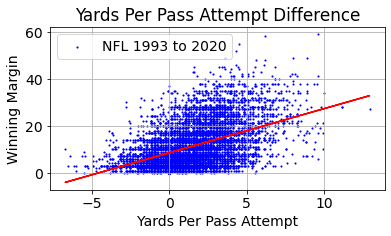

In [10]:
# Draw the Yards per pass attempt plot. With a GRID!
df2 = df[df["winning_margin"] >= 0]
#df2 = df
draw_scatter_plot(df2, 'yards_per_pass_attempt', 'winning_margin', "yards_per_pass_attempt difference", True)

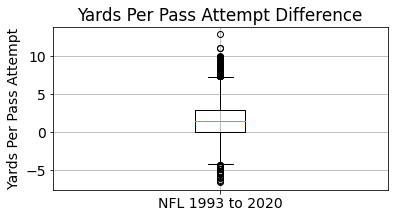

In [11]:
# Draw a box plot of the Yards per pass attempt.
draw_box_plot(df2, 'yards_per_pass_attempt', 'winning_margin', "yards_per_pass_attempt difference", True)

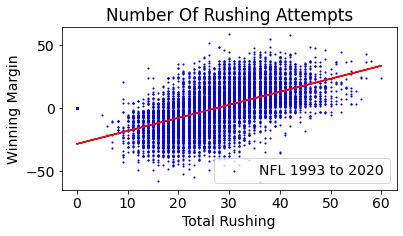

In [12]:
# Draw the Total Rushing plot
draw_scatter_plot(df, 'total_rushing', 'winning_margin', "Number of Rushing Attempts")

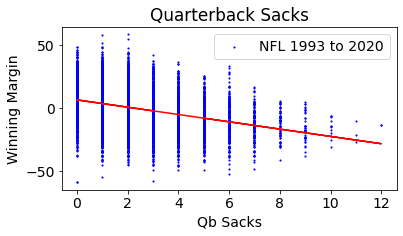

In [13]:
# Draw the QB Sacks plot
draw_scatter_plot(df, 'qb_sacks', 'winning_margin', "Quarterback Sacks")

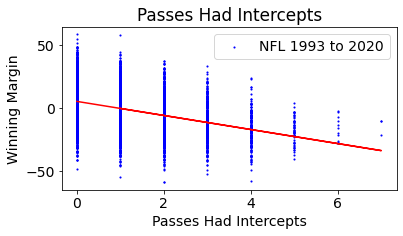

In [14]:
# Draw the Passes Had Intercepts plot
draw_scatter_plot(df, 'passes_had_intercepts', 'winning_margin', "Passes Had Intercepts")